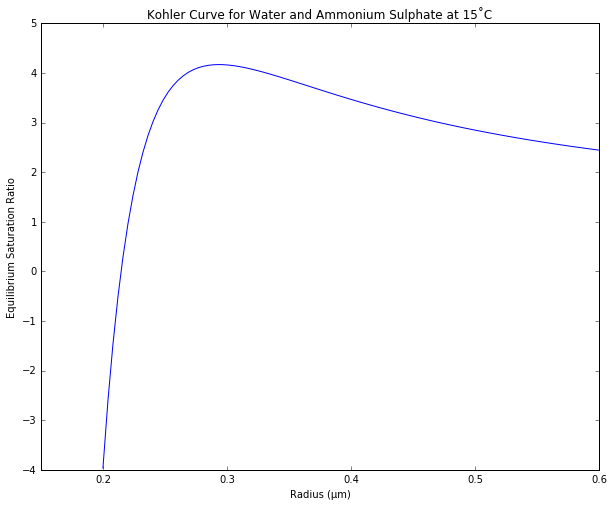

In [27]:
%matplotlib inline

rho = 1 # kg/m^3
temp = 288.15 # K
n_s = 2.3E-18 # moles
sigma = 7.5E-2 # N/m
R_v = 461 # J/kg/K

theradii = np.linspace(0.2E-6,0.6E-6,100)
n_w = (rho*(4/3)*np.pi*(theradii)**3)/0.018
nratio = n_s/n_w

constant_a = sigma/(R_v*rho)

kohlerarray = (1 - nratio)*(np.exp(constant_a/(theradii*temp)))

fig,ax=plt.subplots(1,1,figsize=(10,8))

ax.plot((theradii)*10**6,kohlerarray)
ax.set_xlabel('Radius (µm)')
ax.set_ylabel('Equilibrium Saturation Ratio')
ax.set_title('Kohler Curve for Water and Ammonium Sulphate at 15˚C')

In [10]:
import a405thermo.rootfinder as rf

def eq_radius(rguess, temp2, the_S):
    '''function to find the equilibrium radius for a haze particle
    inputs: rguess, temp (K), the_S (float)
    outputs: the_S - Sguess'''
    
    n_w2 = (rho*(4/3)*np.pi*(rguess)**3)/0.018
    
    Sguess = (1 - n_s/n_w2)*(np.exp(constant_a/(rguess*temp2)))
    
    return the_S - Sguess

In [11]:
givenS = 0.9
temp2 = 288.15 # K

brackets = rf.find_interval(eq_radius,0.2e-6,temp,givenS)

theradius = rf.fzero(eq_radius,brackets,temp,givenS)
print('The equilibrium radius under these conditions is {} µm'.format(theradius*1E6))

The equilibrium radius under these conditions is 0.21977579583989235 µm
